# Enem-4

In [6]:
#importanto os pacotes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from yellowbrick.features import Rank1D
from sklearn.linear_model import LogisticRegression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
df_train = pd.read_csv('./train.csv', encoding='utf8')
df_test = pd.read_csv('./test.csv', encoding='utf8')

In [8]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [9]:
df_train.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1144.000000,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,2288.000000,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,3432.000000,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,4586.000000,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
features = ['TP_ST_CONCLUSAO', 'TP_ESCOLA', 'TP_ANO_CONCLUIU', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_ENSINO',
            'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'TP_LINGUA', 'TP_COR_RACA', 'TP_SEXO', 
            'TP_ESTADO_CIVIL', 'TP_NACIONALIDADE', 'IN_TREINEIRO']

In [11]:
df_train[features] = df_train[features].fillna(0)

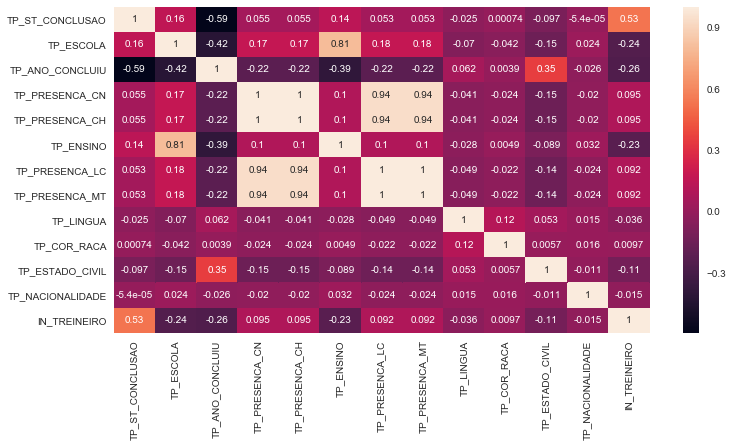

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_train[features].corr(), annot=True)

In [13]:
X = df_train[features].drop('IN_TREINEIRO', axis=1)
y = df_train['IN_TREINEIRO']

In [14]:
#Aplicando LabelEnconding
def Codificar(varivavel, coluna):
    le = preprocessing.LabelEncoder()
    le.fit(varivavel[coluna])
    varivavel[coluna] = le.transform(varivavel[coluna])

In [15]:
#separando a base em train e test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state= 40,
                                                    test_size= 0.30)

In [16]:
df_train[features].head()

,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ANO_CONCLUIU,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_ENSINO,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_LINGUA,TP_COR_RACA,TP_SEXO,TP_ESTADO_CIVIL,TP_NACIONALIDADE,IN_TREINEIRO
0,1,1,4,1,1,0.0,1,1,1,1,M,0.0,1,0
1,2,2,0,1,1,1.0,1,1,1,3,F,0.0,1,0
2,3,1,0,0,0,0.0,0,0,1,3,F,0.0,1,0
3,1,1,9,0,0,0.0,0,0,0,0,F,0.0,1,0
4,1,1,4,0,0,0.0,0,0,1,2,M,0.0,1,0


In [21]:
Codificar(X_train, 'TP_SEXO')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [22]:
#Normalizando os dados
sc = StandardScaler()
X_std = sc.fit_transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


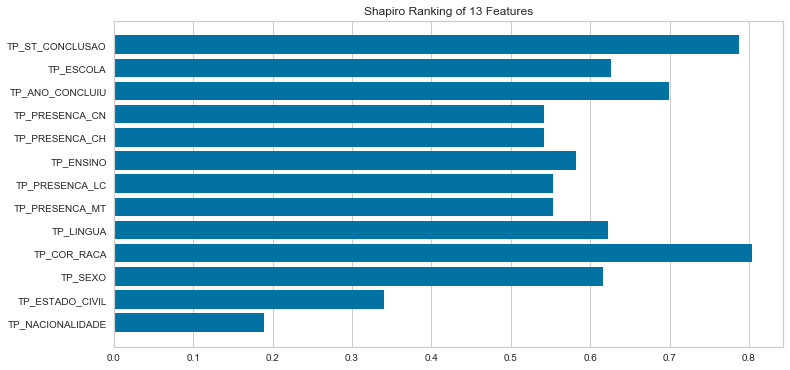

In [23]:
#Visualização da importancia das features usando Shapiro
visualizacao = Rank1D(algorithm='shapiro')
plt.figure(figsize=(12,6))
visualizacao.fit(X_train, y_train)
visualizacao.transform(X_train)
visualizacao.show()

In [24]:
select_features = ['TP_ST_CONCLUSAO', 'TP_ESCOLA', 'TP_ANO_CONCLUIU', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
                   'TP_PRESENCA_MT', 'TP_ENSINO', 'TP_LINGUA', 'TP_COR_RACA', 'TP_SEXO']

In [26]:
X_import = df_train[select_features]

In [27]:
Codificar(X_import, 'TP_SEXO')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_import,
                                                    y,
                                                    random_state= 40,
                                                    test_size= 0.30)

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = model.predict(X_test)

In [31]:
pd.DataFrame({'Predito' : y_pred,
              'Real' : y_test})

,Predito,Real
581,0,0
1944,0,0
4945,0,0
5516,0,0
4954,0,0
3652,1,1
4249,0,0
12497,0,0
8440,0,0
2871,0,0


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier(n_estimators= 2)

In [34]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
y_pred_random = rf.predict(X_test)

In [36]:
pd.DataFrame({'Predito' : y_pred_random,
              'Real' : y_test})

,Predito,Real
581,0,0
1944,0,0
4945,0,0
5516,0,0
4954,0,0
3652,1,1
4249,0,0
12497,0,0
8440,0,0
2871,0,0


In [37]:
from sklearn.svm import SVC

In [38]:
svc = SVC()

In [39]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
y_pred_svc = svc.predict(X_test)

In [41]:
pd.DataFrame({'Predito' : y_pred_svc,
              'Real' : y_test})

,Predito,Real
581,0,0
1944,0,0
4945,0,0
5516,0,0
4954,0,0
3652,1,1
4249,0,0
12497,0,0
8440,0,0
2871,0,0


# Métricas

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3550
           1       0.81      0.97      0.88       569

    accuracy                           0.96      4119
   macro avg       0.90      0.97      0.93      4119
weighted avg       0.97      0.96      0.97      4119



In [44]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3550
           1       0.80      0.98      0.88       569

    accuracy                           0.96      4119
   macro avg       0.90      0.97      0.93      4119
weighted avg       0.97      0.96      0.97      4119



In [45]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3550
           1       0.80      1.00      0.89       569

    accuracy                           0.97      4119
   macro avg       0.90      0.98      0.93      4119
weighted avg       0.97      0.97      0.97      4119



# Balanceado os dados

In [46]:
y_train.groupby(y_train).count()

IN_TREINEIRO
0    8397
1    1214
Name: IN_TREINEIRO, dtype: int64

In [47]:
from imblearn.over_sampling import RandomOverSampler

In [48]:
ros = RandomOverSampler()

In [49]:
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [50]:
y_train_ros.groupby(y_train_ros).count()

IN_TREINEIRO
0    8397
1    8397
Name: IN_TREINEIRO, dtype: int64

In [51]:
rf.fit(X_train_ros, y_train_ros)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_pred_rf_ros = rf.predict(X_test)

In [53]:
pd.DataFrame({'Predito' : y_pred_rf_ros,
              'Real' : y_test})

,Predito,Real
581,0,0
1944,0,0
4945,0,0
5516,0,0
4954,0,0
3652,1,1
4249,0,0
12497,0,0
8440,0,0
2871,0,0


In [55]:
svc.fit(X_train_ros, y_train_ros)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
y_pred_svc_ros = svc.predict(X_test)

In [57]:
pd.DataFrame({'Predito' : y_pred_svc_ros,
              'Real' : y_test})

,Predito,Real
581,0,0
1944,0,0
4945,0,0
5516,0,0
4954,0,0
3652,1,1
4249,0,0
12497,0,0
8440,0,0
2871,0,0


# Aplicando modelo na base test

In [61]:
Codificar(df_test, 'TP_SEXO')

In [64]:
predicao = df_test[select_features].fillna(0)

In [65]:
#Aplicando RandomForestClassifier
y_final = rf.predict(predicao)

In [ ]:
CriaArquivo(y_final)

In [79]:
#Aplicando SVC
y_final_svc = svc.predict(predicao)

In [80]:
CriaArquivo(y_final_svc)

# Exportando arquivo answer

In [77]:
def CriaArquivo(predicao):
    df_test['IN_TREINEIRO'] = np.around(predicao, 2)
    filtro = ['NU_INSCRICAO', 'IN_TREINEIRO']
    df_resultado = df_test[filtro]
    df_resultado.to_csv('answer.csv', index=False)